Adapted from [MultivariateStats.jl](https://juliastats.org/MultivariateStats.jl/stable/pca/).

This notebook is a sanity check that compares PCA from MultivariableStats.jl to the theoretically equivalent Gaussian EPCA from ExpFamilyPCA.jl. While both algorithms are deterministic, the compressions differ because PCA is not unique in general. For that reason, Gaussian EPCA achieves slightly better compression (lower squared Euclidean error).

In [1]:
using ExpFamilyPCA, MultivariateStats, RDatasets, Plots, Distances

# load iris dataset
iris = dataset("datasets", "iris")

# split half to training set
Xtr = Matrix(iris[1:2:end,1:4])'
Xtr_labels = Vector(iris[1:2:end,5])

# split other half to testing set
Xte = Matrix(iris[2:2:end,1:4])'
Xte_labels = Vector(iris[2:2:end,5]);

In [2]:
function calc_avg_distance(pred)
    n = size(pred)[1]
    padded = [pred;; zeros(n)]
    return Distances.sqeuclidean(Xte, padded) / 2n
end

function plot_compression(pred, title)
    setosa = pred'[:, Xte_labels .== "setosa"]
    versicolor = pred'[:, Xte_labels .== "versicolor"]
    virginica = pred'[:, Xte_labels .== "virginica"]
    p = scatter(setosa[1, :], setosa[2, :], setosa[3, :], marker=:circle, linewidth=0, label="Setosa")
    scatter!(versicolor[1, :], versicolor[2, :], versicolor[3, :], marker=:circle, linewidth=0, label="Versicolor")
    scatter!(virginica[1, :], virginica[2, :], virginica[3, :], marker=:circle, linewidth=0, label="Virginica")
    plot!(p, title="$title")
    return p
end


plot_compression (generic function with 1 method)

# MultivariateStats.jl

## PCA

round(calc_avg_distance(pca_pred); digits = 2) = 33.6


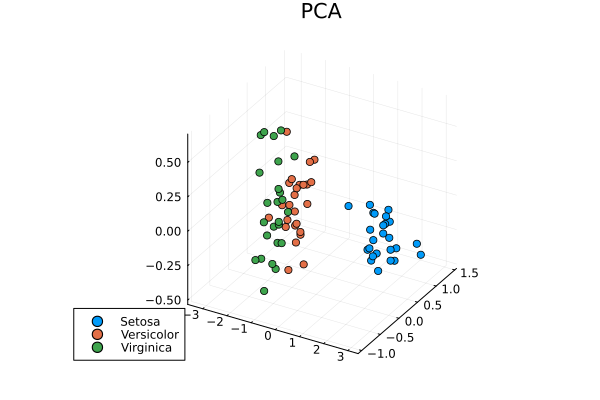

In [3]:
pca = fit(PCA, Xtr; maxoutdim=3)
pca_pred = predict(pca, Xte)'
@show round(calc_avg_distance(pca_pred); digits=2)
p1 = plot_compression(pca_pred, "PCA")

# ExpFamilyPCA

Iteration: 1/100 | Loss: 9.379540944160219
Iteration: 2/100 | Loss: 0.40493439712988777
Iteration: 3/100 | Loss: 0.19960210086367536
Iteration: 4/100 | Loss: 0.1883517760506135
Iteration: 5/100 | Loss: 0.1878888044379436
Iteration: 6/100 | Loss: 0.18787038602561476
Iteration: 7/100 | Loss: 0.187869654364561
Iteration: 8/100 | Loss: 0.18786961797518345
Iteration: 9/100 | Loss: 0.18786961121065512
Iteration: 10/100 | Loss: 0.18786961121065512
Loss converged early. Stopping iteration.
Iteration: 1/100 | Loss: 0.2604100715793625
Iteration: 2/100 | Loss: 0.2604097874530875
Iteration: 3/100 | Loss: 0.2604097510263706
Iteration: 4/100 | Loss: 0.26040974951942786
Iteration: 5/100 | Loss: 0.260409747758554
Iteration: 6/100 | Loss: 0.260409747758554
Loss converged early. Stopping iteration.
round(calc_avg_distance(epca_pred); digits = 2) = 28.73


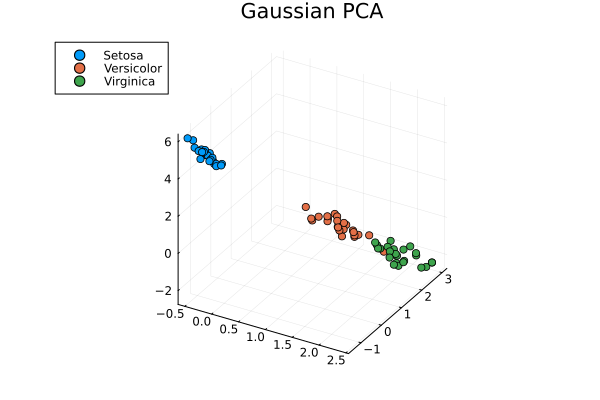

In [4]:
epca = NormalEPCA(4, 3)
fit!(epca, Xtr'; verbose=true, steps_per_print=1)
epca_pred = compress(epca, Xte'; verbose=true, steps_per_print=1)
@show round(calc_avg_distance(epca_pred); digits=2)
p2 = plot_compression(epca_pred, "Gaussian PCA")

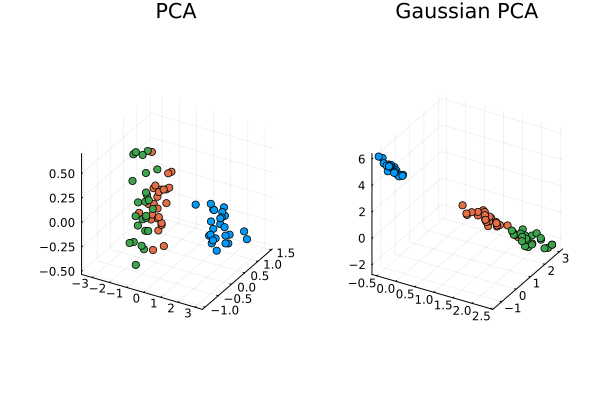

In [5]:
plot(p1, p2, layout=(1, 2), legend=false)